# 1. Importing packages

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

# 2. Reading Dataset

In [41]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.20,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.40,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.20,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.00,Flat,1


In [42]:
df.shape

(918, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


# 3. Preprocessing

In [45]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['ExerciseAngina']= label_encoder.fit_transform(df['ExerciseAngina'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.00,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.00,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.00,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.50,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.00,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,0,1.20,Flat,1
914,68,1,ASY,144,193,1,Normal,141,0,3.40,Flat,1
915,57,1,ASY,130,131,0,Normal,115,1,1.20,Flat,1
916,57,0,ATA,130,236,0,LVH,174,0,0.00,Flat,1


In [46]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
res = one.fit_transform(df[['ChestPainType']])
df = pd.get_dummies(df, columns=['ChestPainType'])
df.head()


,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,0,0.00,Up,0,0,1,0,0
1,49,0,160,180,0,Normal,156,0,1.00,Flat,1,0,0,1,0
2,37,1,130,283,0,ST,98,0,0.00,Up,0,0,1,0,0
3,48,0,138,214,0,Normal,108,1,1.50,Flat,1,1,0,0,0
4,54,1,150,195,0,Normal,122,0,0.00,Up,0,0,0,1,0


In [47]:
res = one.fit_transform(df[['RestingECG']])
df = pd.get_dummies(df, columns=['RestingECG'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.00,Up,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.00,Flat,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.00,Up,0,0,1,0,0,0,0,1
3,48,0,138,214,0,108,1,1.50,Flat,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.00,Up,0,0,0,1,0,0,1,0


In [48]:
res = one.fit_transform(df[['ST_Slope']])
df = pd.get_dummies(df, columns=['ST_Slope'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.00,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.00,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.00,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.50,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.00,0,0,0,1,0,0,1,0,0,0,1


# 4. Spliting Data

In [49]:
X = df.loc[:,df.columns != 'HeartDisease']
y = df['HeartDisease']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# 5. Logistic Regression

In [51]:
# Initialize logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.89
Confusion Matrix:
 [[70 12]
 [ 9 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



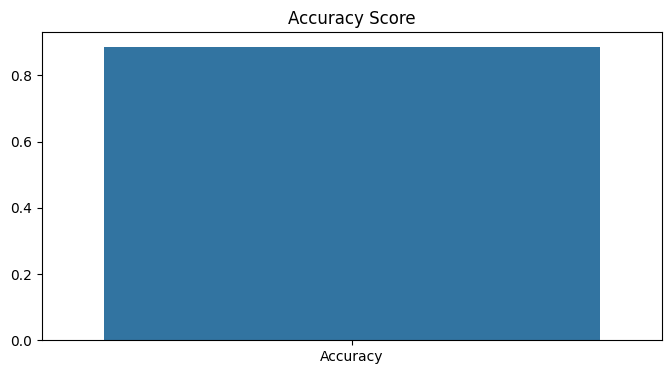

In [52]:
plt.figure(figsize=(8, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Accuracy Score')
plt.show()

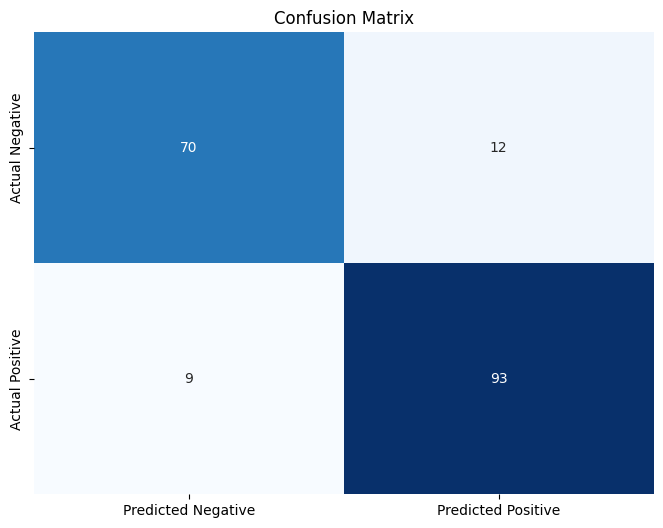

In [53]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

# 6. KNeighbors Classifier

In [54]:
# Initialize KNN model (you can specify the number of neighbors with the 'n_neighbors' parameter)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=6)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.65
Confusion Matrix:
 [[53 29]
 [36 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.65      0.62        82
           1       0.69      0.65      0.67       102

    accuracy                           0.65       184
   macro avg       0.65      0.65      0.64       184
weighted avg       0.65      0.65      0.65       184



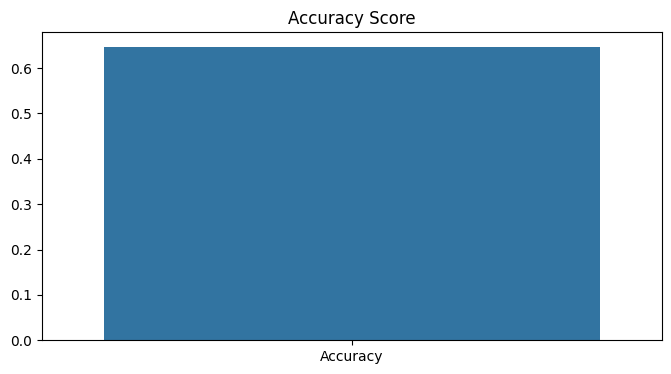

In [55]:
plt.figure(figsize=(8, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Accuracy Score')
plt.show()

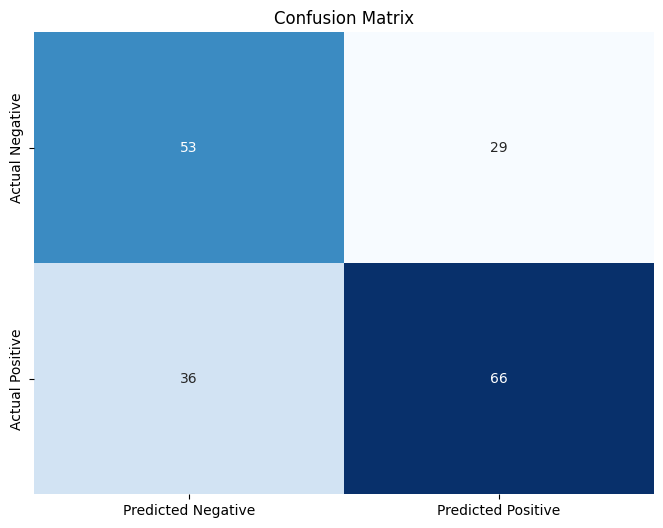

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

# 7. Decision Tree Classifier

In [57]:
# Initialize Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.76
Confusion Matrix:
 [[57 25]
 [20 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72        82
           1       0.77      0.80      0.78       102

    accuracy                           0.76       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.75      0.76      0.75       184



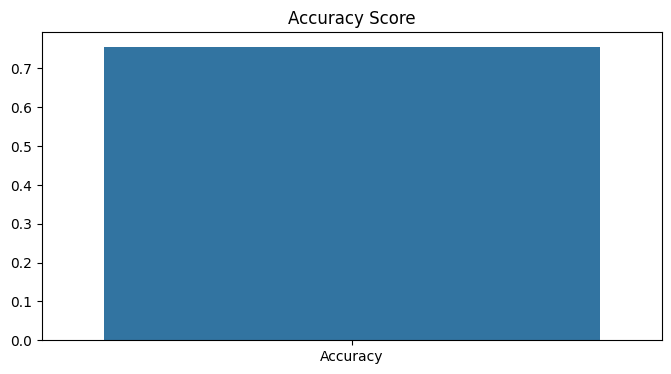

In [58]:
plt.figure(figsize=(8, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Accuracy Score')
plt.show()

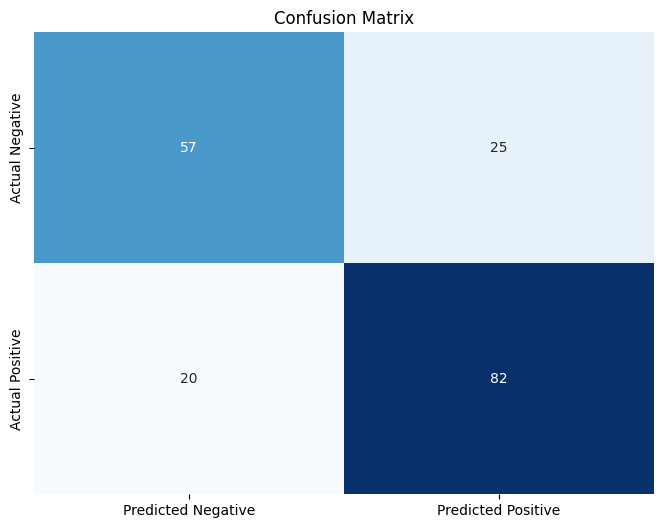

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

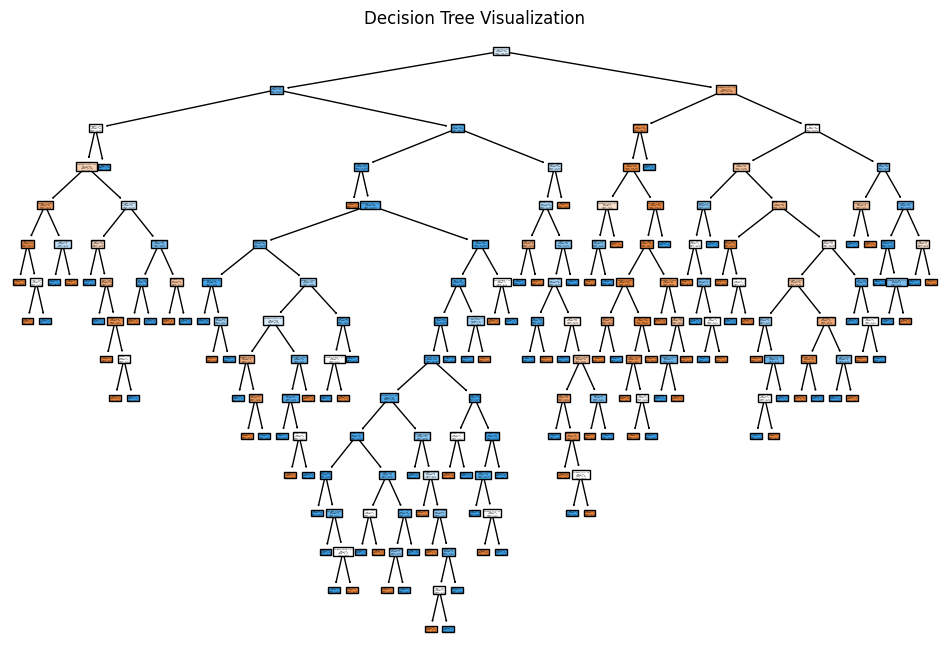

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


# 8. SVM

In [61]:
# Initialize SVM model (you can specify the kernel type, e.g., 'linear', 'rbf', 'poly', etc.)
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42, C = 0.1)

# Train the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [62]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Accuracy: 0.89
Confusion Matrix:
 [[71 11]
 [10 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        82
           1       0.89      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



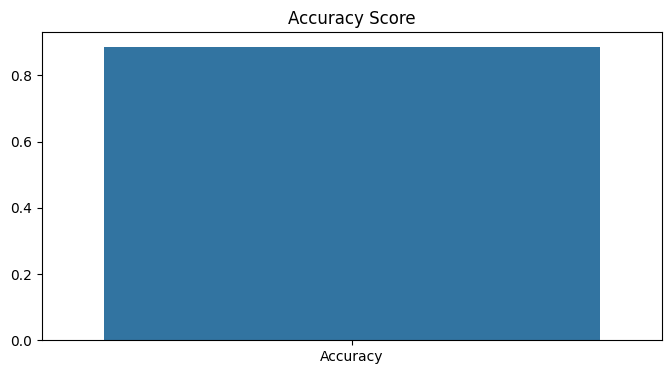

In [63]:
plt.figure(figsize=(8, 4))
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Accuracy Score')
plt.show()

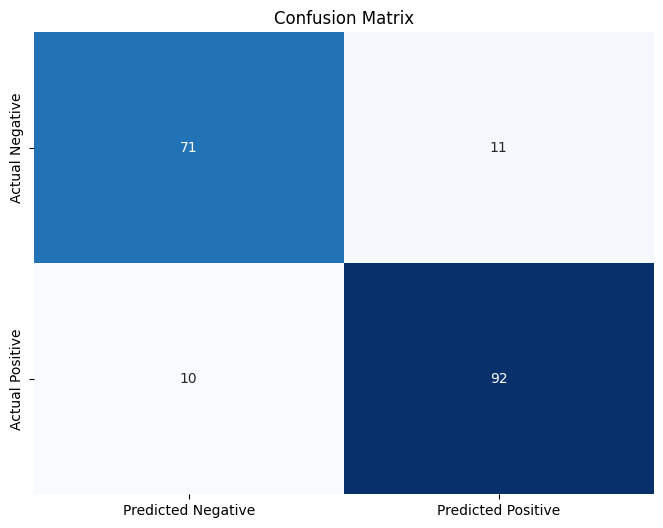

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()